In [ ]:
# inference.py
!pip install timm torch torchvision matplotlib pillow

import torch
import torchvision.transforms as transforms
import timm
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import os

# --------------------------------------------------------
# Load model and weights
# --------------------------------------------------------
def load_model(weights_path, num_classes=22, device=None):
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    model = timm.create_model("efficientnet_b0", pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    print(f" Model loaded on {device.upper()}")
    return model, device

# --------------------------------------------------------
# Define preprocessing transforms (same as training)
# --------------------------------------------------------
def get_transform():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

# --------------------------------------------------------
# Load class names
# --------------------------------------------------------
def get_class_names():
    return [
        "ripe apple",
        "ripe banana",
        "ripe dragon",
        "ripe grapes",
        "ripe lemon",
        "ripe mango",
        "ripe orange",
        "ripe papaya",
        "ripe pineapple",
        "ripe pomegranate",
        "ripe strawberry",
        "unripe apple",
        "unripe banana",
        "unripe dragon",
        "unripe grapes",
        "unripe lemon",
        "unripe mango",
        "unripe orange",
        "unripe papaya",
        "unripe pineapple",
        "unripe pomegranate",
        "unripe strawberry",
    ]


# --------------------------------------------------------
# Run inference on a single image
# --------------------------------------------------------
def predict_image(model, image_path, transform, class_names, device):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found: {image_path}")
    
    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = torch.nn.functional.softmax(outputs, dim=1)[0]
        pred_idx = probs.argmax().item()
        confidence = probs[pred_idx].item() * 100
        pred_label = class_names[pred_idx]
    
    # Visualization
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {pred_label} ({confidence:.2f}%)", fontsize=13, color="green")
    plt.show()
    
    print(f" Predicted: {pred_label} | Confidence: {confidence:.2f}%")
    return pred_label, confidence





 Model loaded on CUDA


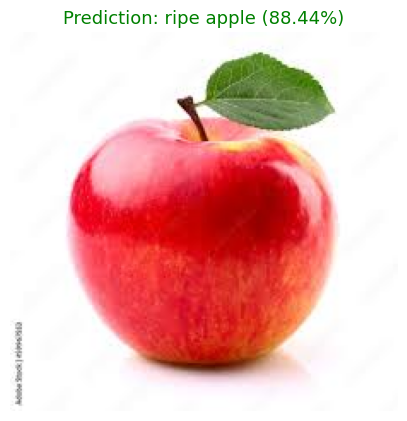

 Predicted: ripe apple | Confidence: 88.44%


('ripe apple', 88.44199180603027)

In [7]:
# Paths
weights_path = "/kaggle/input/efficientt/efficientnet_b0_best.pt"
image_path = "/kaggle/input/testimage/ripeapple.jpeg"

# Load model and data
model, device = load_model(weights_path)
transform = get_transform()
class_names = get_class_names()

# Run prediction
predict_image(model, image_path, transform, class_names, device)
